# 목표 : 부족한 피쳐를 조합 생성 
- 특성공학 => 피쳐 추출 / 선택 / 생성
- 비선형의 데이터에 대한 피쳐 생성 => 곡선 형태의 회귀선 수식
- module : sklearn.preprocessing 내에 포함
- data : fish.csv
- feature : perch의 Height, Length, Width
- target : Perch의 Weight
- 학습유형 : 지도학습 

## <hr>1. 전처리 피쳐 조합 생성 살펴보기

In [84]:
# 모듈 로딩 
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

>>> import numpy as np
>>> from sklearn.preprocessing import PolynomialFeatures
>>> X = np.arange(6).reshape(3, 2)
>>> X
array([[0, 1],
       [2, 3],
       [4, 5]])
>>> poly = PolynomialFeatures(2)
>>> poly.fit_transform(X)
array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])
>>> poly = PolynomialFeatures(interactio 교집합만 할 거라서 자기는 뺌 n_only=True)
>>> poly.fit_transform(X)
array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

In [12]:
poly = PolynomialFeatures() # poly = 다항, degree = 2
poly.fit([[2, 3]])
poly.transform([[2, 3]])

array([[1., 2., 3., 4., 6., 9.]])

- degree = 1  
    - ex) $3x + 2$ -> $bias = 2$
- degree = 2
    - ex) $5x^2 + 9$ ->$bias = 9$
    - ex) $x^2 + 2x$ -> $bias = 0$

In [13]:
# 인스턴스 생성
poly = PolynomialFeatures(include_bias=False) # api 참고 https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures
# bias = 0차항, 필요 없으면 False 

In [14]:
poly.fit([[2, 3]])

PolynomialFeatures(include_bias=False)

In [15]:
poly.transform([[2, 3]]) 

array([[2., 3., 4., 6., 9.]])

transform [$x_1$, $x_2$] -> [1, &nbsp;$x_1$,&nbsp; $x_2$, &nbsp;${x_1}^2$, &nbsp;$x_1x_2$, &nbsp;${x_2}^2$]

In [16]:
poly = PolynomialFeatures(include_bias=False, degree=5)
poly.fit([[2, 3]])
poly.transform([[2, 3]])

array([[  2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.,  16.,  24.,
         36.,  54.,  81.,  32.,  48.,  72., 108., 162., 243.]])

In [17]:
poly.get_feature_names_out() # degree가 5

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2',
       'x1^3', 'x0^4', 'x0^3 x1', 'x0^2 x1^2', 'x0 x1^3', 'x1^4', 'x0^5',
       'x0^4 x1', 'x0^3 x1^2', 'x0^2 x1^3', 'x0 x1^4', 'x1^5'],
      dtype=object)

## <hr>2. perch 데이터를 최대한 만족하는 회귀선을 찾기

### 2-1. 모듈 로딩 및 데이터 준비

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
file = "../data/fish.csv"
dataDF = pd.read_csv(file)
dataDF.info() # 기본 정보 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [27]:
dataDF.drop("Diagonal", axis="columns", inplace=True)

In [28]:
perchDF = dataDF[dataDF.Species == "Perch"]

In [30]:
perchDF = perchDF.drop("Species", axis = "columns").copy()

In [31]:
perchDF.head() # KNN이 아니라서 인덱스 정리 필요없지만 해서 나쁠 거 X

,Weight,Length,Height,Width
72,5.9,8.4,2.1120,1.4080
73,32.0,13.7,3.5280,1.9992
74,40.0,15.0,3.8240,2.4320
75,51.5,16.2,4.5924,2.6316
76,70.0,17.4,4.5880,2.9415


In [32]:
perchDF.reset_index(drop=True, inplace=True)

In [34]:
perchDF.head()

,Weight,Length,Height,Width
0,5.9,8.4,2.1120,1.4080
1,32.0,13.7,3.5280,1.9992
2,40.0,15.0,3.8240,2.4320
3,51.5,16.2,4.5924,2.6316
4,70.0,17.4,4.5880,2.9415


### 2-2. 데이터 확인
- 학습 유형 결정을 위한 단계
- 피쳐 스케일링 진행 여부 체크

In [ ]:
#피처를 생각하지 않고 하나 해보기
#전처리에서 피처를 만들어서 회귀 해보기
#그래서 이 둘을 비교해보라

## 피처 생각 안 하기

In [107]:
from sklearn.model_selection import train_test_split # train, test 분리 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # 데이터 전처리

In [108]:
featureDF = perchDF.iloc[:,1:]
featureDF.head(3)

,Length,Height,Width
0,8.4,2.112,1.4080
1,13.7,3.528,1.9992
2,15.0,3.824,2.4320


In [109]:
targetDF = perchDF.iloc[:,0]
targetDF.head(3)

0     5.9
1    32.0
2    40.0
Name: Weight, dtype: float64

In [120]:
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetDF, random_state=42)

In [134]:
poly = PolynomialFeatures() #################################################
train_poly = pd.DataFrame(poly.fit_transform(X_train)) # fit_transfrom은 train data
train_poly.head(3)

,0,1,2,3,4,5,6,7,8,9
0,1.0,19.6,5.1376,3.0368,384.16,100.69696,59.52128,26.394934,15.601864,9.222154
1,1.0,22.0,5.8750,3.5250,484.00,129.25000,77.55000,34.515625,20.709375,12.425625
2,1.0,18.7,5.1992,3.1234,349.69,97.22504,58.40758,27.031681,16.239181,9.755628


In [135]:
poly.get_feature_names_out()

array(['1', 'Length', 'Height', 'Width', 'Length^2', 'Length Height',
       'Length Width', 'Height^2', 'Height Width', 'Width^2'],
      dtype=object)

In [139]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train_poly, y_train)
print(f"계수 => {lin_reg.coef_} \n절편 => {lin_reg.intercept_}") 

계수 => [   0.           34.70103684  -89.14285211 -182.75736564   -2.26779674
    8.83367054    9.2847728    28.0361006  -121.24942255   95.06523826] 
절편 => 124.14242127301651


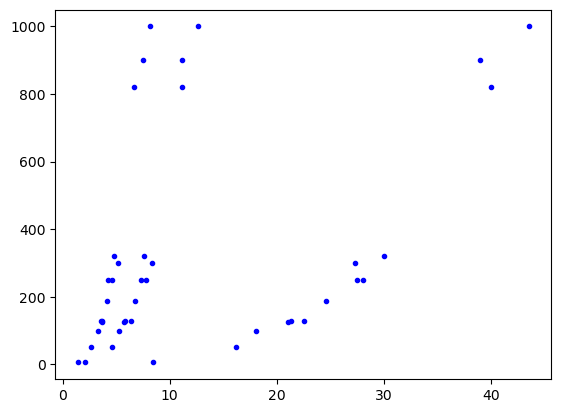

C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


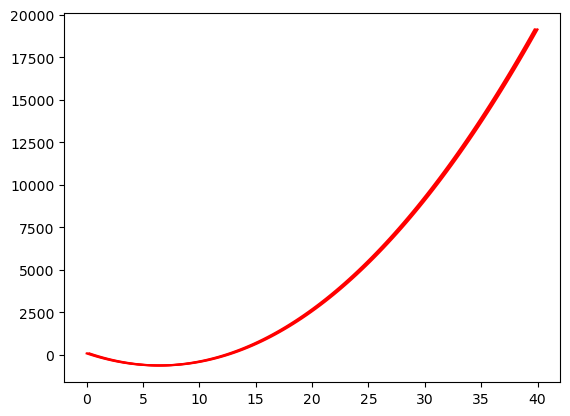

In [147]:
plt.plot(X_test, y_test, "b.")
plt.show()
X_new = np.linspace(0, 40, 300).reshape(100, 3)
X_new_poly = poly.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X_new, y_new, "r-")

In [78]:
mean_squared_error(y_test, preds, squared=False)

44.843744586858804